<a href="https://colab.research.google.com/github/gueyeAbdoul/Projet_Machine_Learning_2024_2025/blob/main/Projet_ML_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet de Machine Learning et Applications MASTER 1 MIAGE**

---



# **Description du problème et Objectifs**



# Contexte :
 Notre projet s'inscrit dans le domaine du marketing bancaire. Une institution bancaire portugaise a mené des campagnes de marketing direct pour promouvoir un produit financier : un dépôt à terme. Ces campagnes étaient basées sur des appels téléphoniques effectués auprès des clients. L'objectif de la campagne était de convaincre les clients de souscrire à ce produit.

 # Problème à résoudre :
 Le problème principal est de prédire si un client souscrira ou non à un dépôt à terme après avoir été contacté par téléphone. Cela implique de déterminer, en fonction des caractéristiques des clients et des informations sur les campagnes marketing, si la réponse du client sera positive ("yes") ou négative ("no").

 # Objectif :    
 Dans ce projet, notre objectif est de construire un modèle de classification capable de prédire avec précision si un client souscrira à un dépôt à terme. Notre modèle permettra ensuite d'optimiser les campagnes marketing en ciblant les clients les plus susceptibles de souscrire, ce qui réduit les coûts et améliorant l'efficacité des campagnes.


#**Type de problème**

Notre but est est de prédire si un client souscrira ("yes") ou non ("no") à un dépôt à terme, donc la variable cible est une variable catégorielle à deux classes :
*   "yes" : le client souscrit à un dépôt à terme.
*   "no" : le client ne souscrit pas à un dépôt à terme.:

Donc, il s'agit bien d'un problème de classification.



#**Définition des features et de la variable cible**

Nous avons 45211 instances pour le fichier "bank-full.csv" et 4521 instances pour le fichier "bank.csv", avec 16 variables d'entrées (features) et une variable de sortie.
Les features (variables d'entrées ou variables explicatives) sont les variables utilisées pour prédire la variable cible. Nous avons 16 variables explicatives qui sont organisées par :

*  Données du client :
1.  age (numérique) - Âge du client.
2.  job (catégorielle) - Type d'emploi.
3.  marital (catégorielle) - Statut matrimonial.
4.  education (catégorielle) - Niveau d'éducation.
5. default (binaire) - Avoir un crédit en défaut ("yes" ou "no").
6.  balance (numérique) - Solde bancaire moyen annuel.
7.  housing (binaire) - Avoir un prêt immobilier ("yes" ou "no").
8.  loan (binaire) - Avoir un prêt personnel ("yes" ou "no").

* Informations sur la dernière interaction :
9.  contact (catégorielle) - Type de contact (téléphone fixe ou mobile).
10.  day (numérique) - Jour du dernier contact.
11. month (catégorielle) - Mois du dernier contact.
12. duration (numérique) - Durée du dernier contact (en secondes).

* Autres attributs:
13. campaign (numérique) - Nombre total de contacts durant la campagne actuelle.
14. pdays (numérique) - Nombre de jours depuis le dernier contact (ou -1 si jamais contacté).
15. previous (numérique) - Nombre de contacts précédents avant cette campagne.
16. poutcome (catégorielle) - Résultat de la campagne précédente ("success", "failure", etc.).

Variable cible (variable de sortie) :
y : Indique si le client a souscrit un dépôt à terme (binaire : "yes" ou "no").

# **Prétraitement des données**

   age          job  marital  education default  balance housing loan   contact  day month  duration  campaign  pdays  previous poutcome   y
0   30   unemployed  married    primary      no     1787      no   no  cellular   19   oct        79         1     -1         0  unknown  no
1   33     services  married  secondary      no     4789     yes  yes  cellular   11   may       220         1    339         4  failure  no
2   35   management   single   tertiary      no     1350     yes   no  cellular   16   apr       185         1    330         1  failure  no
3   30   management  married   tertiary      no     1476     yes  yes   unknown    3   jun       199         4     -1         0  unknown  no
4   59  blue-collar  married  secondary      no        0     yes   no   unknown    5   may       226         1     -1         0  unknown  no

Détails de souscription des clients :
- Clients ayant souscrit ('yes') : 11.52%
- Clients n'ayant pas souscrit ('no') : 88.48% 



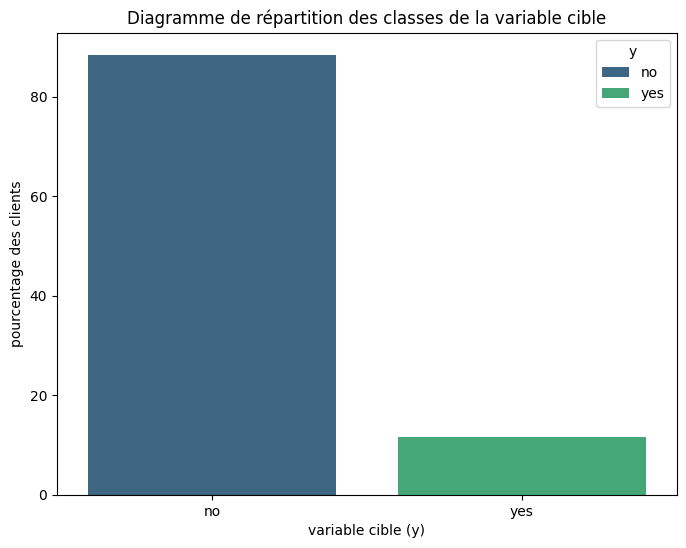

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# fichier csv à ajouter
nom_fichier = 'bank.csv'
# Charger les données dans un DataFrame (df)
df = pd.read_csv(nom_fichier, sep=';')

# Ajuster manuellement la largeur d'affichage des colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Afficher les premières lignes du DataFrame
print(df.head())

# Pour le comptage des occurrences de la variable cible
target_counts = df['y'].value_counts(normalize=True)*100

# Affichage détaillé pour la variable cible y
print("\nDétails de souscription des clients :")
print(f"- Clients ayant souscrit ('yes') : {target_counts['yes']:.2f}%")
print(f"- Clients n'ayant pas souscrit ('no') : {target_counts['no']:.2f}% \n")

# Visualisation avec un barplot de la variable cible
plt.figure(figsize=(8, 6)) # taille de la figure
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette="viridis", legend=True)
plt.title("Diagramme de répartition des classes de la variable cible")
plt.xlabel("variable cible (y)")
plt.ylabel("pourcentage des clients")
plt.show()


**Commentaires :** Nous constatons qu'il y'a un désiquilibre très important pour la représentation des classes (yes et no) pour la variable cible (y). La classe "no", c'est à dire les clients qui n'ont pas souscrit à un dépôt, présente 88,48% des représentations de la variable cible tandis que la classe "yes", c'est à dire les clients qui ont sonscrit à un dépôt n'est représentée que 11,52%. Un modèle entraîné sur ces données pourrait être biaisé en faveur de la classe majoritaire ("no"), car il pourrait simplement prédire "no" pour tous les cas et obtenir une précision élevée (88,48%) sans réellement apprendre à distinguer les clients qui souscrivent à un dépôt puisque l'algorithme aura tendance à mieux predire les personnes n'ayant pas scouscrit à un dépôt.

object    10
int64      7
Name: count, dtype: int64
type des colonnes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Si colonnes vides alors True et False sinon 
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

Nombre de valeurs manquantes par colonne :
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0


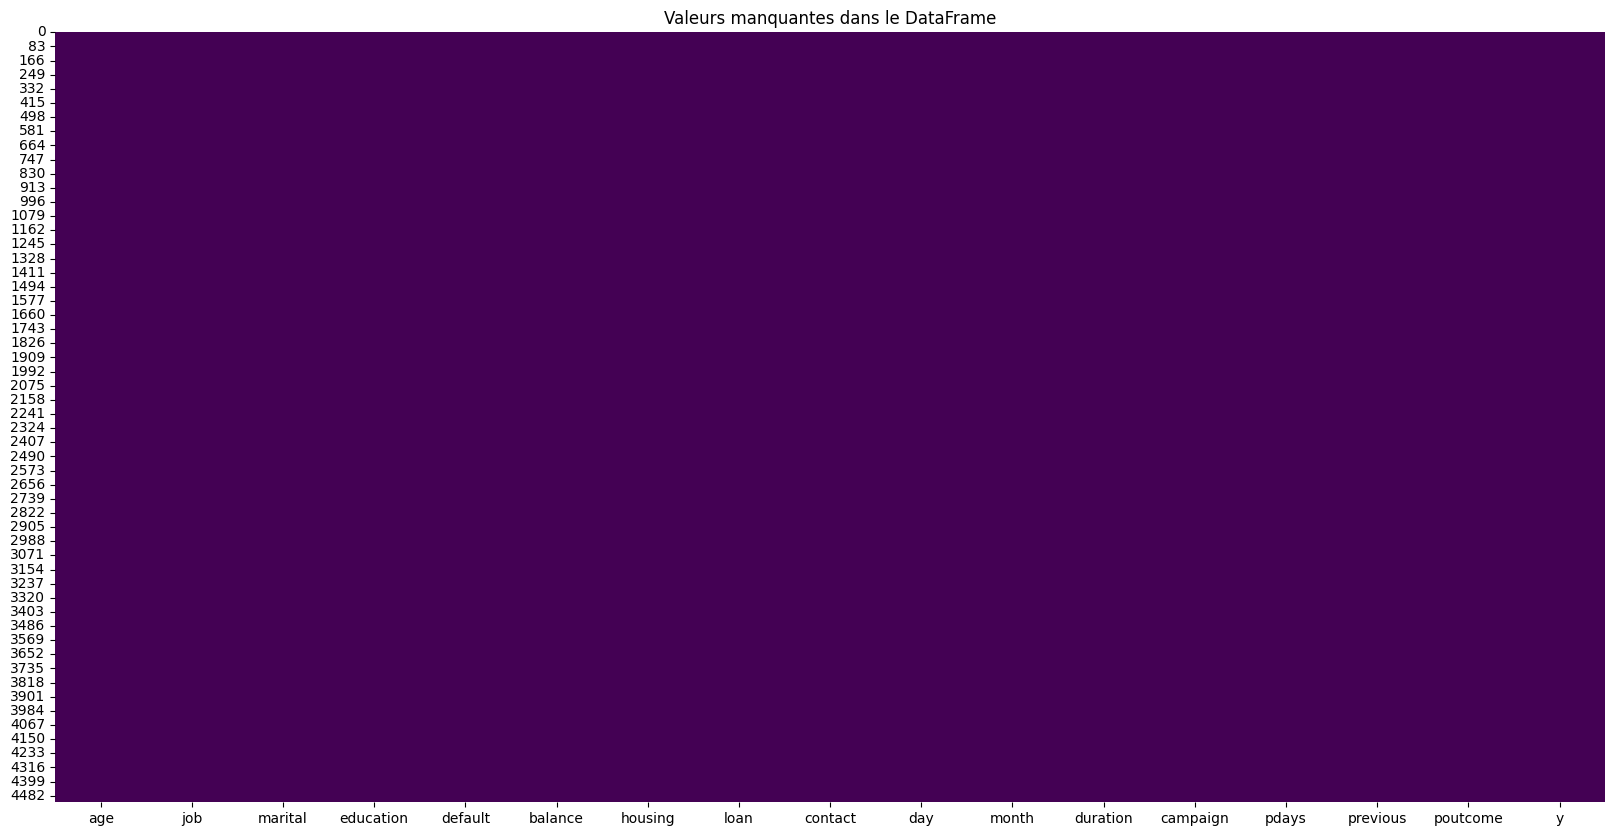

In [ ]:
print(df.dtypes.value_counts())

print("type des colonnes\n")
print(df.dtypes)
print()
# Vérifions les colonnes où toutes les valeurs sont manquantes
print("Si colonnes vides alors True et False sinon ")
print(df.isna().all())

# Vérifier le nombre de valeurs manquantes par colonne
print("\nNombre de valeurs manquantes par colonne :")
print(df.isna().sum()) # si 0 alors il n'il y'a aucune valeur manquante sur cette colonne
print()
#Identification des valeurs manquantes
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Valeurs manquantes dans le DataFrame")
plt.show()

**Commentaire** : Nous pouvons conclure qu'avec cette dataframe, aucune colonne n'est vide et aussi aucune colonne n'a une valeur manquante.

# Encodage

In [ ]:
target = df['y']  # Sauvegardons la variable cible

# On Exclut la variable cible avant l'encodage
df_encode = df.drop(columns=['y'])

# mapping pour les colonne de valeur "no" et "yes" excepter la colonne y (variable cible)
mapping = {"yes": 1, "no": 0}

# Appliquons le mapping aux colonnes :
df_encode['default'] = df_encode['default'].map(mapping)
df_encode['housing'] = df_encode['housing'].map(mapping)
df_encode['loan'] = df_encode['loan'].map(mapping)

# Appliquons le One-Hot Encoding à toutes les colonnes de type object dans df_encode
df_encode = pd.get_dummies(df_encode, columns=df_encode.select_dtypes(include=['object']).columns, drop_first=False)

# Convertissons les True/False en 0/1
df_encode = df_encode.astype(int)

# Réinsérons la variable cible dans le DataFrame encodé
df_encode['y'] = target

# Affichons les premières lignes pour vérifier
print(df_encode.head())


   age  default  balance  housing  loan  day  duration  campaign  pdays  previous  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  education_primary  education_secondary  education_tertiary  education_unknown  contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown   y
0   30        0     1787        0     0   19        79         1     -1         0           0                0                 0              0               0            0                  0             0            0               0               1            0                 0                1               0                  1             

**Commentaires :** Nous avons transformer toutes les colonnes de valeurs catégorielles en valeur numériques sauf la colonne cible (y)

# Répartition

In [ ]:
# Répartition des données

from sklearn.model_selection import train_test_split

# Séparons les données en train (60%) et temp (40%) avec stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    df_encode.drop(columns=['y']), df_encode['y'],
    test_size=0.4, random_state=42, stratify=df_encode['y']
)

# Séparons temp en validation (50%) et test (50%) avec stratification
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42, stratify=y_temp
)


In [ ]:
print(f"Taille de l'ensemble d'entraînement : {len(X_train)} échantillons")

print("\nproportion de l'ensemble des données d'entraienement")
y_train.value_counts(normalize=True)

Taille de l'ensemble d'entraînement : 2712 échantillons

proportion de l'ensemble des données d'entraienement


,proportion
y,
no,0.884587
yes,0.115413


In [ ]:
print(f"Taille de l'ensemble de validation : {len(X_val)} échantillons")
print("\nproportion de l'ensemble des données de validation")
y_val.value_counts(normalize=True)

Taille de l'ensemble de validation : 904 échantillons

proportion de l'ensemble des données de validation


,proportion
y,
no,0.884956
yes,0.115044


In [ ]:
print(f"Taille de l'ensemble de test : {len(X_test)} échantillons")
print("\nproportion de l'ensemble des données de test")
y_test.value_counts(normalize=True)

Taille de l'ensemble de test : 905 échantillons

proportion de l'ensemble des données de test


,proportion
y,
no,0.885083
yes,0.114917


**Commentaires :** Nous avons divisé les données en trois sous ensembles dont 70% pour le train, 15% pour la validation et 15% pour le test. Ensuite nous avons respecté la proportion des classes (yes et no) pour la distribution de la variable cible, pour une bonne interprétation des données et nous permet d'éviter des erreurs dinterprétation dans les données d'évaluation.

# Le suréchantillonnage (oversampling)

In [ ]:
# La bibliothèque imblearn propose une implémentation de SMOTE
# qui génère de nouveaux échantillons synthétiques pour la classe minoritaire.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# X_train : Features d'entraînement
# y_train : Labels d'entraînement

# Appliquons SMOTE pour suréchantillonner la classe minoritaire
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribution des classes avant suréchantillonnage :")
print(y_train.value_counts(normalize = True))

print("\nDistribution des classes après suréchantillonnage :")
print(pd.Series(y_train_resampled).value_counts(normalize = True))

Distribution des classes avant suréchantillonnage :
y
no     0.884587
yes    0.115413
Name: proportion, dtype: float64

Distribution des classes après suréchantillonnage :
y
no     0.5
yes    0.5
Name: proportion, dtype: float64


In [ ]:
X_train_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
X_train_df['y'] = y_train_resampled
print(X_train_df)

# Séparons X et y après suréchantillonnage
X_train = X_train_df.drop(columns=['y'])
y_train = X_train_df['y']

      age  default  balance  housing  loan  day  duration  campaign  pdays  previous  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  education_primary  education_secondary  education_tertiary  education_unknown  contact_cellular  contact_telephone  contact_unknown  month_apr  month_aug  month_dec  month_feb  month_jan  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown    y
0      37        0     1689        1     0   29       645         2     -1         0           0                0                 0              0               1            0                  0             0            0               0               0            0                 0                1               0                  0      

**Commentaires :** Nous avons corrigé le problème de désiquilibre des classes qui reviennent avec une proportion de 50% "yes" et de 50% "no".

# **Algorithmes utilisés / Modéles**


Dans ce projet, nous avons à traiter un problème de classification, dans ce cas nous avons choisi les modéles K-Nearest Neighbors (KNN), Random Forest et Naïve Bayes car ces trois modéles offrent des approches différentes pour la classification et nous permettent de comparer leurs performances.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialisation du modèle
rfc = RandomForestClassifier(random_state = 42)

# Entraînement du modèle sur l'ensemble d'entraînement
rfc.fit(X_train, y_train)

# Affichage des noms des colonnes utilisées dans l'entraînement
print(X_train.columns)

# Affichage de l'importance de chaque feature dans le modèle
print(rfc.feature_importances_)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')
[0.03602996 0.00095583 0.04593474 0.06179051 0.02161234 0.03753248
 0.19840177 0.02074549 0.03945581 0.01364483 0.0095904  0.03354133
 0.00310391 0.0

**Classement de l'importance des features**

In [ ]:
# Nous allons classer les variables de la plus influente à la moins influente
variable_importante = pd.DataFrame({
    'Variable': X_train.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Affichage du classement des variables
print(variable_importante)

               Variable  Importance
6              duration    0.198402
3               housing    0.061791
31      contact_unknown    0.055294
2               balance    0.045935
40            month_may    0.040985
8                 pdays    0.039456
23      marital_married    0.037899
5                   day    0.037532
0                   age    0.036030
11      job_blue-collar    0.033541
47     poutcome_unknown    0.031964
27   education_tertiary    0.028283
26  education_secondary    0.025766
44     poutcome_failure    0.024730
24       marital_single    0.022044
37            month_jul    0.021657
4                  loan    0.021612
7              campaign    0.020745
19       job_technician    0.018914
25    education_primary    0.016607
33            month_aug    0.015164
41            month_nov    0.014667
9              previous    0.013645
14       job_management    0.013627
29     contact_cellular    0.013368
38            month_jun    0.011782
22     marital_divorced    0

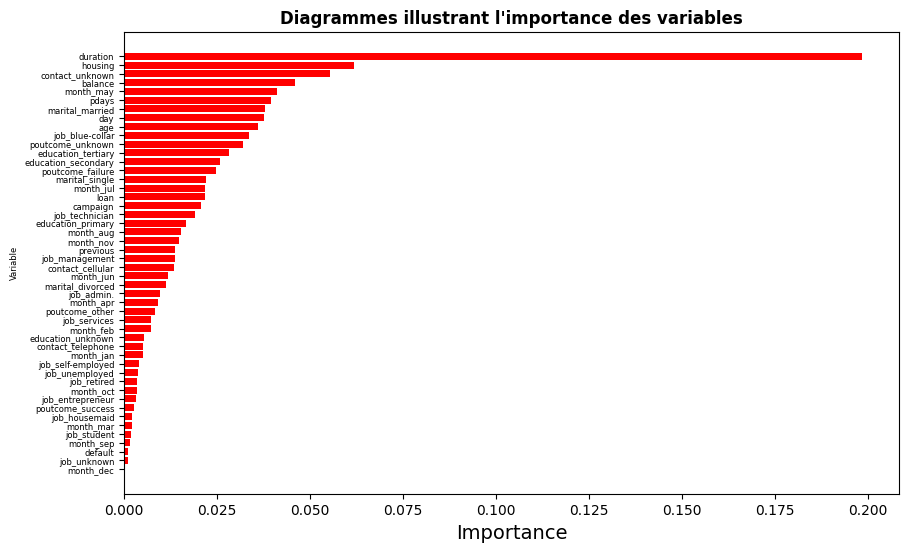

In [ ]:
# Visualisation des importances des variables
plt.figure(figsize=(10, 6))
plt.barh(variable_importante['Variable'], variable_importante['Importance'], color='red')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Variable', fontsize=6)
plt.title('Diagrammes illustrant l\'importance des variables', fontweight='bold')

plt.yticks(fontsize=6)
plt.gca().invert_yaxis()  # On inverse l'axe des Y pour afficher les plus importantes en haut

plt.show()

In [ ]:
# Nous utilisons la moyenne pour déterminer le seuil
seuil = variable_importante['Importance'].mean()
print(f"Seuil utilisé pour sélectionner les variables : {seuil}")

# Sélection des variables les plus importantes à partir du seuil
var_importants = variable_importante[variable_importante['Importance'] > seuil]
print("Variables sélectionnées :")
print(var_importants)

Seuil utilisé pour sélectionner les variables : 0.020833333333333332
Variables sélectionnées :
               Variable  Importance
6              duration    0.198402
3               housing    0.061791
31      contact_unknown    0.055294
2               balance    0.045935
40            month_may    0.040985
8                 pdays    0.039456
23      marital_married    0.037899
5                   day    0.037532
0                   age    0.036030
11      job_blue-collar    0.033541
47     poutcome_unknown    0.031964
27   education_tertiary    0.028283
26  education_secondary    0.025766
44     poutcome_failure    0.024730
24       marital_single    0.022044
37            month_jul    0.021657
4                  loan    0.021612


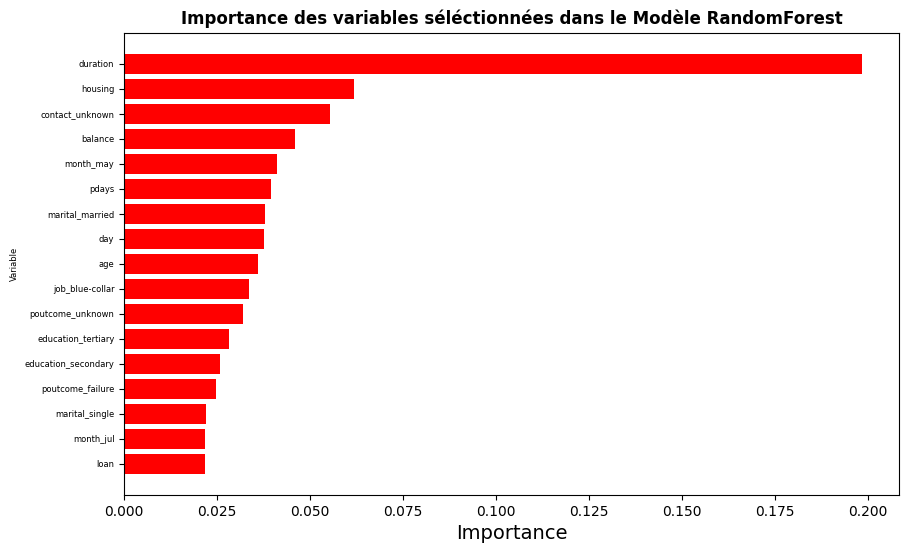

In [ ]:
# Visualisation des importances des variables séléctionnées
plt.figure(figsize=(10, 6))
plt.barh(var_importants['Variable'], var_importants['Importance'], color='red')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Variable', fontsize=6)
plt.title('Importance des variables séléctionnées dans le Modèle RandomForest', fontweight='bold')

plt.yticks(fontsize=6)
plt.gca().invert_yaxis()  # On inverse l'axe des Y pour afficher les plus importantes en haut

plt.show()

**Commentaire :** L'analyse des importances des variables nous a permis d'identifier les variables les plus influentes dans le modèle RandomForestClassifier. En appliquant un seuil que nous avons calculé à partir de la moyenne, nous avons sélectionné uniquement les variables les plus pertinentes, réduisant ainsi la complexité du modèle tout en conservant un bon niveau de précision.

**Entrainement et évaluation des modeles**

In [ ]:
# Premier modéle : K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à explorer pour le KNN
# On teste différentes valeurs pour 'n_neighbors' et 'weights'
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Création du modèle KNN sans spécification d'hyperparamètres au départ
knn_classifier = KNeighborsClassifier()

# Mise en place de la validation croisée avec recherche des meilleurs hyperparamètres
# Avec GridSearchCV, on teste toutes les combinaisons possibles d'hyperparamètres en utilisant une validation croisée à 5 plis
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5)

# Entraînement du modèle avec les données d'apprentissage (X_train et y_train)
grid_search_knn.fit(X_train, y_train)

# Affichage du meilleur score obtenu lors de la recherche des hyperparamètres
# et du modèle avec les meilleurs paramètres trouvés
print(f"Meilleur score obtenu pour KNN : { grid_search_knn.best_score_:.3f}")
print("Meilleur modèle KNN : ", grid_search_knn.best_estimator_)


Meilleur score obtenu pour KNN : 0.877
Meilleur modèle KNN :  KNeighborsClassifier(n_neighbors=3, weights='distance')


In [ ]:
# Deuxiéme modèle : Random Forest (Forêt Aléatoire)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à explorer pour le Random Forest
# On teste différentes valeurs pour 'n_estimators', 'max_depth'
param_grid_rf = {
    'n_estimators': [5, 10, 20, 50, 100, 150, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 3, 5, 10, 15, 20]       # Profondeur maximale de chaque arbre
}

# Création du modèle Random Forest sans spécification d'hyperparamètres au départ
rf_classifier = RandomForestClassifier()

# Mise en place de la validation croisée avec recherche des meilleurs hyperparamètres
# Avec GridSearchCV, on teste toutes les combinaisons possibles d'hyperparamètres en utilisant une validation croisée à 5 plis
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=5)

# Entraînement du modèle avec les données d'apprentissage (X_train et y_train)
grid_search_rf.fit(X_train, y_train)

# Affichage du meilleur score obtenu lors de la recherche des hyperparamètres
# et du modèle avec les meilleurs paramètres trouvés
print(f"Meilleur score obtenu pour Random Forest : { grid_search_rf.best_score_:.3f}")
print("Meilleur modèle Random Forest : ", grid_search_rf.best_estimator_)


Meilleur score obtenu pour Random Forest : 0.942
Meilleur modèle Random Forest :  RandomForestClassifier(max_depth=20)


In [ ]:
# Troisiéme modéle : Naïve Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Définition de la grille des hyperparamètres à explorer pour le Naïve Bayes
param_grid_nb = {} # en général avec le modèle Naive Bayes, on a pas d'hyperpramètres spécifiques

# Création du modèle Naïve Bayes sans spécification d'hyperparamètres au départ
nb_classifier = GaussianNB()

# Mise en place de la validation croisée avec recherche des meilleurs hyperparamètres
# Avec GridSearchCV, on teste toutes les combinaisons possibles d'hyperparamètres en utilisant une validation croisée à 5 plis
grid_search_nb = GridSearchCV(nb_classifier, param_grid_nb, cv=5)

# Entraînement du modèle avec les données d'apprentissage (X_train et y_train)
grid_search_nb.fit(X_train, y_train)

# Affichage du meilleur score obtenu lors de la recherche des hyperparamètres et du modèle
print(f"Meilleur score obtenu pour Naive Bayes : { grid_search_nb.best_score_:.3f}")
print("Meilleur modèle Naïve Bayes : ", grid_search_nb.best_estimator_)


Meilleur score obtenu pour Naive Bayes : 0.884
Meilleur modèle Naïve Bayes :  GaussianNB()


**Commentaire :** D'après les scores qu'on a obtenu avec les trois modèles, nous constatons que le modèle Random Forest (Forêt Aleatoire) a obtenu le meilleur score (0,94) avec l'évaluation par validation croisée sur les données d'entrainement.

# **Métriques d'évaluation**

 **Matrice de confusion**

Matrice de confusion :
[[656 145]
 [ 48  56]]

Évaluation du modèle KNN :
Précision (Accuracy) : 0.787

Rapport de classification :
               precision    recall  f1-score   support

          no       0.93      0.82      0.87       801
         yes       0.28      0.54      0.37       104

    accuracy                           0.79       905
   macro avg       0.61      0.68      0.62       905
weighted avg       0.86      0.79      0.81       905



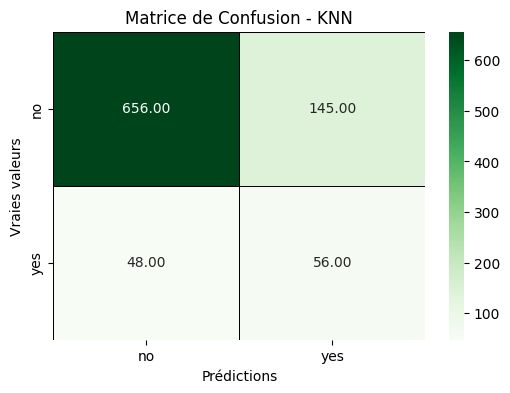

In [ ]:
# Modele KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# On choisit le meilleur modèle KNN qu'on a trouvé précédemment
best_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Entraînement du modèle avec les données d'entrainement
best_knn.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_knn = best_knn.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Matrice de confusion :")
print(conf_matrix_knn)
print()

# Affichage des métriques d'évaluation
print("Évaluation du modèle KNN :")
print(f"Précision (Accuracy) : {accuracy_score(y_test, y_pred_knn):.3f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_knn))

# visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt=".2f", cmap="Greens",
            xticklabels=set(y_test), yticklabels=set(y_test), linewidths=0.5, linecolor="black")

plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion - KNN")
plt.show()

**Commentaire :**

Notre modèle KNN atteint une précision (Accuracy) de 78,7 %, ce qui indique une bonne performance. Cependant, nous constatons un déséquilibre dans la classification des classes : la classe "no" est bien détectée (93 % de précision), tandis que la classe "yes" est mal reconnue (28 % de précision). Le rappel (recall) pour "yes" est plus élevé (54 %), mais cela signifie aussi un grand nombre de faux positifs. Ainsi, notre modèle favorise la classe majoritaire, ce qui pourrait être amélioré en ajustant les poids des classes ou en utilisant un autre algorithme (modèle).

Matrice de confusion:
[[778  23]
 [ 82  22]]

Évaluation du modèle Random Forest (Forêt Aléatoire) :
Précision (Accuracy) : 0.884

Rapport de classification :
               precision    recall  f1-score   support

          no       0.90      0.97      0.94       801
         yes       0.49      0.21      0.30       104

    accuracy                           0.88       905
   macro avg       0.70      0.59      0.62       905
weighted avg       0.86      0.88      0.86       905



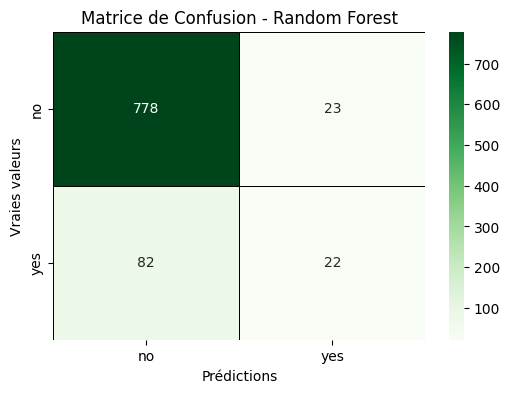

In [ ]:
# Modele Random Forest (Forêt Aleatoire)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# On choisit le meilleur modèle rfc qu'on a trouvé précédemment
best_rfc = RandomForestClassifier(n_estimators=150, random_state=42)

# Entraînement du modèle avec les données d'entrainement
best_rfc.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_rfc = best_rfc.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print("Matrice de confusion:")
print(conf_matrix_rfc)
print()
# Affichage des métriques d'évaluation
print("Évaluation du modèle Random Forest (Forêt Aléatoire) :")
print(f"Précision (Accuracy) :{accuracy_score(y_test, y_pred_rfc) : .3f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rfc))

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rfc, annot=True, fmt="d", cmap="Greens",
            xticklabels=set(y_test), yticklabels=set(y_test), linewidths=0.5, linecolor="black")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion - Random Forest")
plt.show()

**Commentaire :**

Notre modèle Random Forest (Forêt Aléatoire) affiche une précision de 88,4%, ce qui est une bonne performance. Il classifie très bien la classe "no" avec 97% de rappel (recall), mais éprouve des difficultés à identifier correctement la classe "yes", avec seulement 21% de rappel. Cela signifie que de nombreux cas "yes" sont mal classés comme "no". La précision de la classe "yes" est de 49%, indiquant que les prédictions positives sont peu fiables. Ainsi, pour améliorer notre modèle, nous pourrions rééquilibrer les classes ou ajuster les hyperparamètres.

Matrice de confusion:
[[700 101]
 [ 81  23]]

Évaluation du modèle Naive Bayes :
Précision (Accuracy) :  0.799

Rapport de classification :
               precision    recall  f1-score   support

          no       0.90      0.87      0.88       801
         yes       0.19      0.22      0.20       104

    accuracy                           0.80       905
   macro avg       0.54      0.55      0.54       905
weighted avg       0.81      0.80      0.81       905



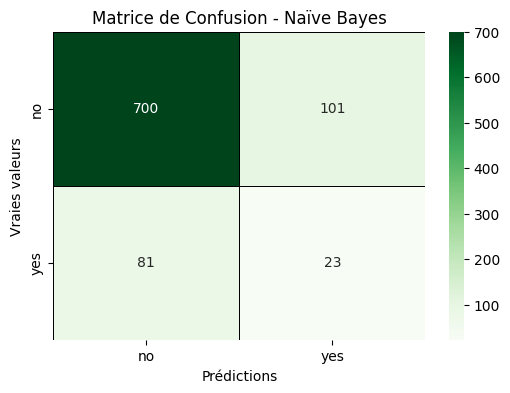

In [ ]:
# Modèle Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# On choisit le meilleur modèle nb qu'on a trouvé précédemment
best_nb = GaussianNB()

# Entraînement du modèle avec les données d'entrainement
best_nb.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred_nb = best_nb.predict(X_test)

# Calcul de la matrice de confusion
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Matrice de confusion:")
print(conf_matrix_nb)
print()
# Affichage des métriques d'évaluation
print("Évaluation du modèle Naive Bayes :")
print(f"Précision (Accuracy) : {accuracy_score(y_test, y_pred_nb) : .3f}")
print("\nRapport de classification :\n", classification_report(y_test, y_pred_nb))

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Greens",
            xticklabels=set(y_test), yticklabels=set(y_test), linewidths=0.5, linecolor="black")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion - Naïve Bayes")
plt.show()

**Commentaire :**    

Notre modèle Naïve Bayes atteint une précision de 79,9%, ce qui est correct mais inférieur aux deux autres modèles testés. Il performe bien sur la classe "no" avec 87% de rappel, mais il peine à identifier correctement la classe "yes", avec seulement 22% de rappel. Cela signifie que la majorité des cas positifs sont mal classés. De plus, la précision des prédictions "yes" est très faible (19%), rendant le modèle peu fiable pour cette classe. Ainsi, pour améliorer notre modèle, nous pourrions tester d'autres variantes de Naïve Bayes ou appliquer des techniques de rééquilibrage des classes.

**Conclusion :**

Pour conclure avec les matrices de confusion, après l’évaluation des trois modèles (KNN, Random Forest et Naïve Bayes), nous constatons que Random Forest est le modèle le plus performant, avec une précision globale de 88,4%, qui surpasse KNN avec 78,7% et Naïve Bayes 79,9%. Cependant, nous pouvons noter que tous les modèles ont du mal à prédire correctement la classe minoritaire ("yes"), avec des rappels (recall) faibles (KNN : 54%, Random Forest : 21%, Naïve Bayes : 22%). En effet le modèle KNN offre un bon compromis mais reste moins fiable que Random Forest, tandis que Naïve Bayes est le moins efficace, souffrant d’une très faible précision pour la classe "yes". Ainsi, pour améliorer ces résultats, nous pourrions rééquilibrer les classes ou tester d'autres techniques d'optimisation.

# Courbe ROC (Receiver Operating Characteristic)

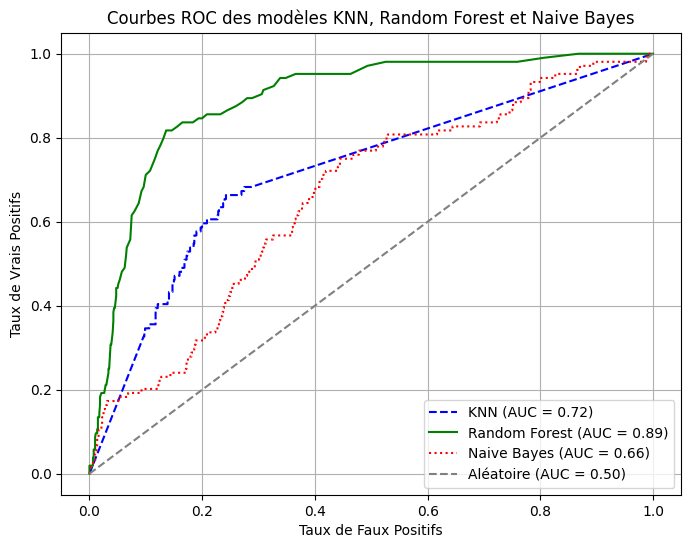

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Prédiction des probabilités pour chaque modèle
y_proba_knn = best_knn.predict_proba(X_test)[:, 1]
y_proba_rf = best_rfc.predict_proba(X_test)[:, 1]
y_proba_nb = best_nb.predict_proba(X_test)[:, 1]

# Calcul des courbes ROC pour chaque modèle
# tvp : taux de vrais positifs
# tfp : taux de faux positifs
tfp_knn, tvp_knn, _ = roc_curve(y_test, y_proba_knn, pos_label='yes')
tfp_rf, tvp_rf, _ = roc_curve(y_test, y_proba_rf, pos_label='yes')
tfp_nb, tvp_nb, _ = roc_curve(y_test, y_proba_nb, pos_label='yes')

# Calcul de l'AUC (Area Under Curve) pour chaque modèle
auc_knn = auc(tfp_knn, tvp_knn)
auc_rf = auc(tfp_rf, tvp_rf)
auc_nb = auc(tfp_nb, tvp_nb)

# Affichage des courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(tfp_knn, tvp_knn, label=f'KNN (AUC = {auc_knn:.2f})', color='blue', linestyle='--')
plt.plot(tfp_rf, tvp_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green', linestyle='-')
plt.plot(tfp_nb, tvp_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})', color='red', linestyle=':')

# Courbe de référence (aléatoire)
plt.plot([0, 1], [0, 1], label='Aléatoire (AUC = 0.50)', color='gray', linestyle='--')

# Personnalisation du graphique
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbes ROC des modèles KNN, Random Forest et Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Commentaires :    
Nous constatons que le modèle Random Forest présente la meilleure performance parmi les trois modèles, avec une AUC de 0,89. Ce qui nous permet de distinguer les classes positives et les classes négatives. En plus la courbe ROC est proche du coin supérieur gauche, ce qui montre un bon équilibre entre le taux de vrais positifs et le taux de faux positifs.
Le modèle KNN quant à lui, a une performance modérée, avec une AUC de 0,72. Bien qu'il soit meilleur qu'un modèle aléatoire, il est moins performant que le Random Forest et nous constatons que sa courbe ROC est plus éloignée du coin supérieur gauche, ce qui suggère une capacité de discrimination moins élevée. Enfin, le modèle Naive Bayes a la performance la plus faible parmi les trois, avec une AUC de 0,66. Cela indique une capacité limitée à distinguer les classes positives et négatives. En effet, sa courbe ROC est proche de la ligne de référence aléatoire, ce qui montre que le modèle a des difficultés à faire des prédictions précises.

Ainsi, les résultats des courbes ROC montrent que le modèle Random Forest est le modèle le plus performant avec une AUC de 0,89 parmi les trois modéles qu'on a utilisé pour notre problème de classification. Avec  ce modèle, on est capable de distinguer efficacement les clients qui souscriront à un dépôt à terme et ceux qui ne le feront pas.



# Courbe de gains cumulés

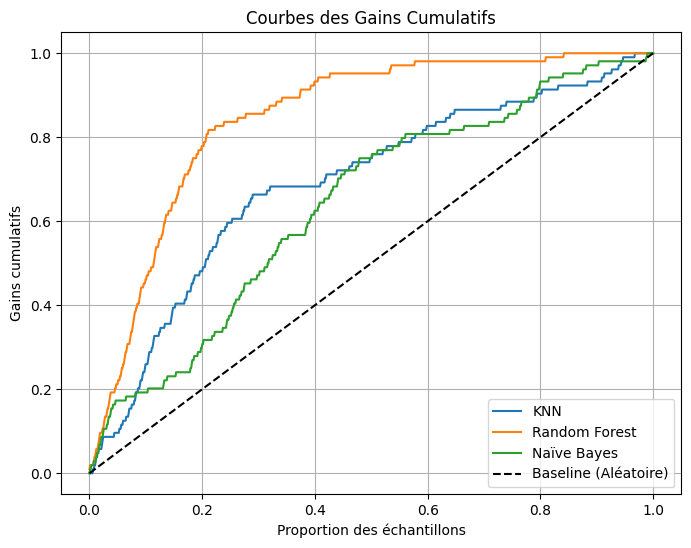

In [ ]:
# Nous allons définir une fonction de gain cumulatif pour calculer de manière optimale les gains cumulatifs
def cumulative_gain(y_true, y_scores):
    y_true_numeric = y_true.map({'yes': 1, 'no': 0}).astype(int)
    sorted_indices = np.argsort(y_scores)[::-1]
    y_sorted = np.array(y_true_numeric)[sorted_indices]

    cumulative_gains = np.cumsum(y_sorted) / np.sum(y_sorted)
    x_values = np.linspace(0, 1, len(y_sorted))
    return x_values, cumulative_gains

# Probabilités prédites des modèles
knn_probs = best_knn.predict_proba(X_test)[:, 1]
rf_probs = best_rfc.predict_proba(X_test)[:, 1]
nb_probs = best_nb.predict_proba(X_test)[:, 1]

# Calcul des gains cumulatifs
x_knn, y_knn = cumulative_gain(y_test, knn_probs)
x_rf, y_rf = cumulative_gain(y_test, rf_probs)
x_nb, y_nb = cumulative_gain(y_test, nb_probs)

# Visualisation des courbes
plt.figure(figsize=(8, 6))
plt.plot(x_knn, y_knn, label='KNN')
plt.plot(x_rf, y_rf, label='Random Forest')
plt.plot(x_nb, y_nb, label='Naïve Bayes')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline (Aléatoire)')

plt.xlabel('Proportion des échantillons')
plt.ylabel('Gains cumulatifs')
plt.title('Courbes des Gains Cumulatifs')
plt.legend()
plt.grid()
plt.show()


**Commentaires :**

La courbe des gains cumulatifs montre que le modèle Random Forest (orange) est le plus performant, car il atteint rapidement une forte proportion d'instances positives avec peu d'échantillons. Le modèle KNN (bleu) suit derrière avec une performance intermédiaire, tandis que Naïve Bayes (vert) est le moins performant, se rapprochant davantage de la ligne de référence aléatoire (pointillée noire). Une courbe plus éloignée de cette diagonale signifie une meilleure capacité de discrimination. Donc, avec 20% des échantillons, le modèle Random Forest identifie déjà environ 80% des cas positifs, ce qui indique une bonne efficacité. Le modèle KNN et le modèle Naïve Bayes montrent des performances plus faibles, bien que toujours meilleures qu’une sélection aléatoire. Ainsi le modèle Random Forest reste le modèle le plus performant parmi nos trois modèles.

# Courbe d'apprentissage

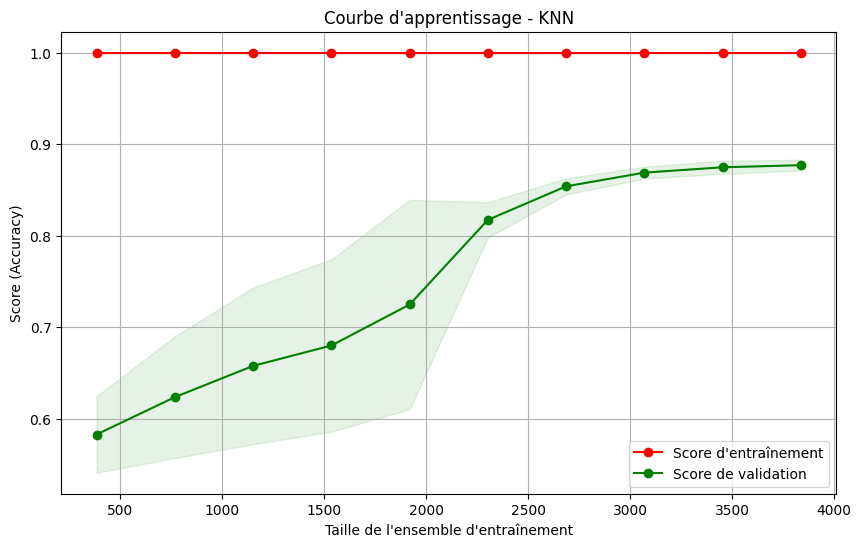

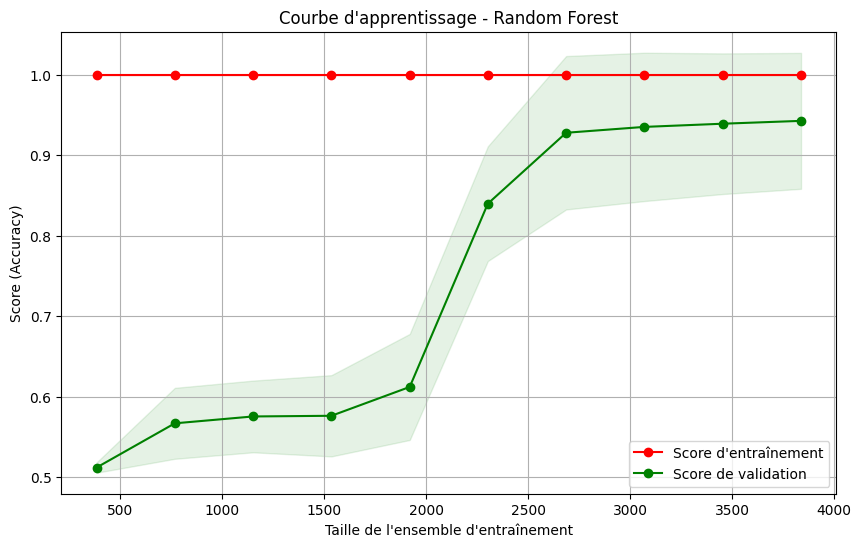

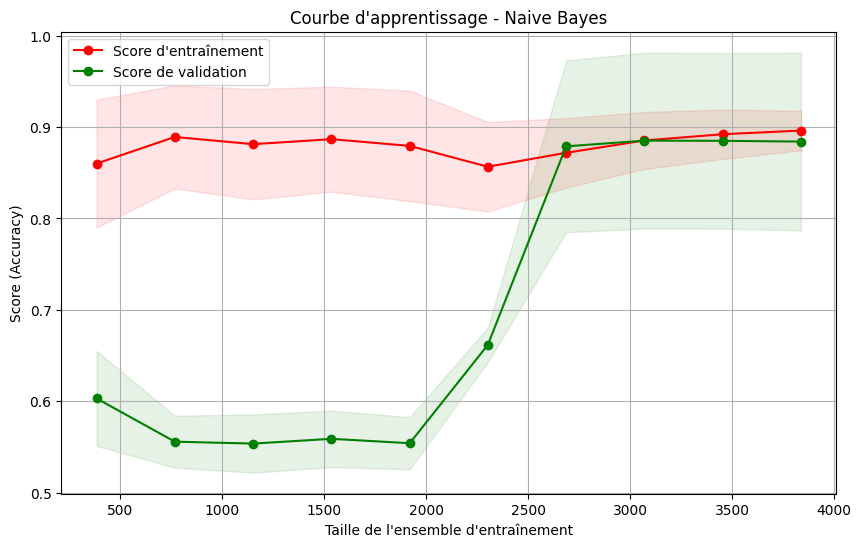

In [ ]:
from sklearn.model_selection import learning_curve

# Fonction pour tracer les courbes d'apprentissage
def plot_learning_curve(model, X, y, title, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring="accuracy", n_jobs=-1
    )

    # Calcul des moyennes et écarts-types
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Pour visualiser les courbes
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
    plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Score de validation")

    plt.title(f"Courbe d'apprentissage - {title}")
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score (Accuracy)")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Tracer les courbes d'apprentissage pour chaque modèle
plot_learning_curve(best_knn, X_train, y_train, title="KNN")
print()
plot_learning_curve(best_rfc, X_train, y_train, title="Random Forest")
print()
plot_learning_curve(best_nb, X_train, y_train, title="Naive Bayes")

**Commentaires :**

Nous constatons que le modèle KNN sur-apprend fortement, obtenant une précision d'entraînement de 1, mais une validation plus basse qui atteint environ un score de 0,85. Nous constatons que son amélioration avec plus de données est lente, indiquant une faible généralisation.

Ensuite, le modèle Random Forest sur-apprend aussi, mais il généralise mieux, atteignant environ un score de plus de 0,90 en validation. En effet, son score s’améliore plus rapidement avec la taille des données, ce qui le rend plus robuste et plus performant.

Enfin, avec le modèle Naive Bayes, nous constatons que les scores d'entraînement et de validation sont proches, mais ils stagnent environ autour de 0,88. Cela montre que le modele s'améliore avec plus de données mais reste moins performant par rapport aux deux autres modèles.

Ainsi, nous pouvons affirmer que le modèle Random Forest est plus performant en le comparant avec nos deux autres modèles.

# **Recherche des parametres optimaux**

In [ ]:
# KNN : Recherche du meilleur nombre de voisins
knn_grid = {'n_neighbors': np.arange(3, 11)}
knn = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=10)
knn.fit(X_train, y_train)
print("Meilleurs paramètres KNN :", knn.best_params_)

# Random Forest : Recherche du meilleur nombre d'arbres avec une profondeur maximale
rf_grid = {'n_estimators': [25, 50, 75, 100, 150, 200, 300], 'max_depth': [1, 10, 20]}
rf = GridSearchCV(RandomForestClassifier(), rf_grid, cv=10)
rf.fit(X_train, y_train)
print("Meilleurs paramètres Random Forest :", rf.best_params_)

# Naïve Bayes (Pas d'hyperparamètres à optimiser)
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Modèle Naïve Bayes sans hyperparamètres")


Meilleurs paramètres KNN : {'n_neighbors': 3}
Meilleurs paramètres Random Forest : {'max_depth': 20, 'n_estimators': 300}
Modèle Naïve Bayes sans hyperparamètres


**Commentaires :**

Les résultats montrent que le modèkle KNN fonctionne mieux avec 3 voisins, ce qui favorise une classification précise. Ensuite, le modèle Random Forest donne de meilleures performances avec 200 arbres et une profondeur maximale de 20, ce qui équilibre bien la complexité et la généralisation. Enfin, le modèle Naïve Bayes ne nécessite pas d'optimisation, car son efficacité repose principalement sur l'hypothèse d’indépendance des variables.

# **Mise à l'échelle (Scaling)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Mise à l'échelle des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle KNN avec scaling
knn = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_neighbors=3))])
knn.fit(X_train, y_train)
knn_score = accuracy_score(y_test, knn.predict(X_test))

# Avec le modèle Random Forest, on a pas besoin à faire du scaling
rf = RandomForestClassifier(n_estimators=200, max_depth=20)
rf.fit(X_train, y_train)
rf_score = accuracy_score(y_test, rf.predict(X_test))

# Modèle Naïve Bayes avec scaling
nb = Pipeline([('scaler', StandardScaler()), ('model', GaussianNB())])
nb.fit(X_train, y_train)
nb_score = accuracy_score(y_test, nb.predict(X_test))

# Affichage des scores
print("Scores des modéles avant mise à l'echelle (scaling) :")
print(f"Meilleur score obtenu pour KNN : { grid_search_knn.best_score_:.3f}")
print(f"Meilleur score obtenu pour Random Forest : { grid_search_rf.best_score_:.3f}")
print(f"Meilleur score obtenu pour Naïve Bayes : { grid_search_nb.best_score_:.3f}")
print()
print("Scores des modéles après mise à l'echelle (scaling) :")
print(f"KNN : {knn_score:.3f}")
print(f"Random Forest : {rf_score:.3f}")
print(f"Naïve Bayes : {nb_score:.3f}")


Scores des modéles avant mise à l'echelle (scaling) :
Meilleur score obtenu pour KNN : 0.877
Meilleur score obtenu pour Random Forest : 0.942
Meilleur score obtenu pour Naïve Bayes : 0.884

Scores des modéles après mise à l'echelle (scaling) :
KNN : 0.874
Random Forest : 0.886
Naïve Bayes : 0.796


**Commentaires :**

Nous constatons que l'effet du scaling varie selon les modéles. Avec le modèle KNN, Nous avons un score de  0,877 avant la mise à l'echelle et après la mise à l'echelle un score de 0,874, ce qui montre une très légère baisse de la variation du score, car KNN est sensible aux distances mais l'impact est très petit. Ensuite avec le modele Random Forest, Avant la mise à l'echelle (scaling), le modéle présente un score de 0,943 et après le scaling, il présente un score de 0,887, donc on peut estimer qu'on a une baisse assez importante, malgré que la mise à l'echelle ne soit pas applicable pour le modèle Random Forest. Enfin avec le modèle Naïve Bayes, son score avant la mise à l'echelle est de 0,884 et son score après la mise à l'echelle est de 0,796, donc nous constatons qu'il y'a une forte diminution, ce qui montre que la distribution des données après la mise à l'echelle ne correspond pas parfaitement aux hypothèses du modèle.
Ainsi, nous pouvons conclure que la mise à l'echelle (scaling) peut influencer les performances des modèles si les données  sont mal adaptées après transformation.


# **CONCLUSION :**



En définitive, ce projet de Machine Learning appliqué au domaine du marketing bancaire, nous a permis d'explorer différentes approches pour prédire si un client souscrira à un dépôt à terme après avoir été contacté par téléphone. En suivant une méthodologie rigoureuse, nous avons effectué une analyse pour explorer et traiter les données, sélectionné les variables pertinentes et testé plusieurs algorithmes de classification et les évalués.

Les résultats obtenus montrent que le modèle Random Forest (Forêt Aléatoire) s'est avéré être le plus performant, avec une précision de 88,4% et un score F1 de 94%. Cette performance indique une bonne capacité du modèle à différencier les clients susceptibles de souscrire du reste de la population, par rapport aux deux autres modéles (KNN avec une précision de 78,7% et Naïve Bayes avec 79,9%).

Toutefois, certaines limitations subsistent, notamment nous constatons qu'il y'a des déséquilibres importants sur la distribution des classes "no" et "yes" des différentes modéles qu'on a utilisé. Pour améliorer ces résultats, nous pourrons envisager d'explorer d'autres techniques, l'utilisation de modèles plus avancés commme XGBoost ou le Deep Learning ou l'intégration de nouvelles sources de données.

Ainsi, ce projet nous a permi de comprendre et de connaître l'importance du Machine Learning dans la prise de décision marketing, en fournissant aux institutions bancaires un outil puissant pour optimiser leurs campagnes et cibler efficacement leurs clients.